# phase_1_project
# Aviation Accident Analysis
# Overview
This project provides a data-driven analysis of aviation accidents to help stakeholders determine which aircraft are low risk and viable investment to purchase for commercial and private enterprises diversifying the companies portfilio expanding to the aviation industry.



# Business Understanding
- Frequency occurance of accidents
- Key factors affecting accident rates
- Level of aircraft damage in relevance to Purpose.of.flight
- Serverity of accident(fatality and survival)
- Least involved make in accidents

# Data understanding
Analysis sourced from [Aviation_Data.csv] dataset provided by the National Transportation Saftey Board containing aviation accidents data from 1962-2023 in the United States and international waters.
# Key data fields
- Accident.Number
- Event.Date
- Amateur.Built
- Weather.Condition
- Aircraft.damage
- Purpose.of.flight
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries
- Make

# Analysis


# Data cleaning

Setup

In [682]:
# Importing necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# load the csv file into a dataframe  df
df = pd.read_csv('Dataset/Aviation_Data.csv', index_col=0,low_memory=False)
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


- Handling missing data

In [683]:
df.isna().sum().sort_values(ascending=True)

Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Make                       1522
Model                      1551
Amateur.Built              1561
Country                    1685
Injury.Severity            2459
Registration.Number        2841
Aircraft.damage            4653
Weather.Condition          5951
Total.Uninjured            7371
Number.of.Engines          7543
Purpose.of.flight          7651
Report.Status              7843
Engine.Type                8555
Total.Fatal.Injuries      12860
Total.Minor.Injuries      13392
Total.Serious.Injuries    13969
Publication.Date          16689
Broad.phase.of.flight     28624
Airport.Name              37644
Airport.Code              40216
Latitude                  55966
Longitude                 55975
Aircraft.Category         58061
FAR.Description           58325
Air.carrier               73700
Schedule                  77766
dtype: int64

In [684]:
# drop misiing data in the subsets
df=df.dropna(subset=['Accident.Number','Event.Date','Make','Amateur.Built'])
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


- Removing duplicated entries

The column Accident.Number is best to identify and remove any duplicated values in the dataset considering its distinct uniqueness.

In [685]:
df['Accident.Number'].duplicated().sum()

np.int64(26)

In [686]:
df.drop_duplicates(subset='Accident.Number', inplace=True)

- groupby Accident.Number by 5years in Event.Date

Grouping the filtered dataset into groups of 5 years to narrow down the large dataset and provide clarity for easy evaluation.

In [687]:
# Event.Date is in datetime formart
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

#extract 'year' in datetime
df['year'] = df['Event.Date'].dt.year

#group every 5years from 1962-2023
bins=np.arange(1962, 2028, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['year_group'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
df=df.dropna(subset='year_group')


Creating a column in the dataset to display counts of each row o the Accident.Number as per every year_group for easier comprehension of the dataset

In [688]:
df['number_of_accidents']=df.groupby('year_group',observed=True)['Accident.Number'].transform('count')
df.head()

                                                  

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,year_group,number_of_accidents
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,1962-1966,1
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,1972-1976,1
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,1977-1981,4
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,1977-1981,4
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,...,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,1977-1981,4


# Modelling
   # Exploratory Data Analysis
   

In this section , use of Numpy and pandas will be essential to answer the stakeholders questions under business understanding.
Matplotlib and pivot tables are used for visualisation.

- Frequency of accidents per year_group

In [689]:
frequency_of_accidents=df.groupby('year_group',observed=True)['Accident.Number'].count().reset_index(name='Accidentcount')
frequency_of_accidents

,year_group,Accidentcount
0,1962-1966,1
1,1972-1976,1
2,1977-1981,4
3,1982-1986,16575
4,1987-1991,13081
5,1992-1996,11421
6,1997-2001,10845
7,2002-2006,9863
8,2007-2011,9285
9,2012-2016,8162


- Visualisation of the frequency of accidents as per every year_group.
Considering the data from the frequency of accidents is not recognised as a dataframe by the library. To plot extract the frequencies as data for dataframes. 


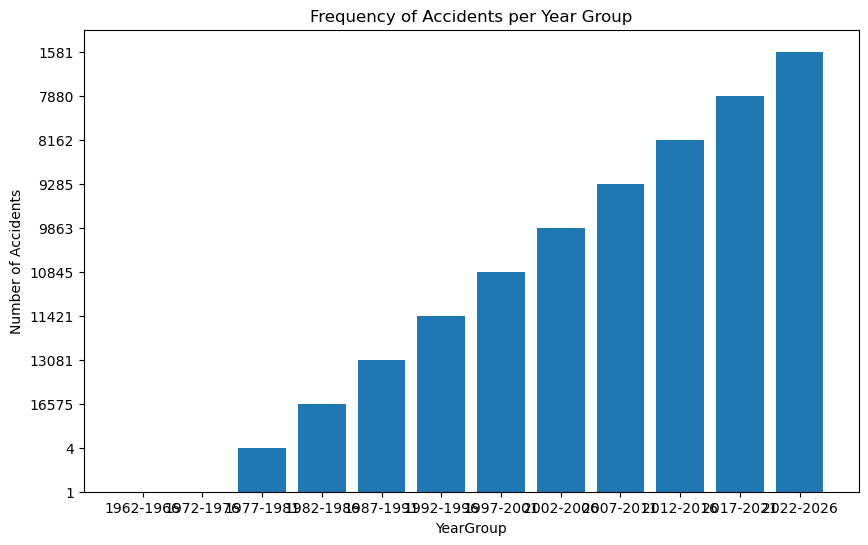

In [690]:
year_groups=year_group=['1962-1966','1972-1976','1977-1981','1982-1986','1987-1991','1992-1996','1997-2001','2002-2006','2007-2011','2012-2016','2017-2021','2022-2026']
Accident_counts=['1','1','4','16575','13081','11421','10845','9863','9285','8162','7880','1581']
data = {'year_group': year_groups, 'Accidentcount': Accident_counts}
frequency_of_accidents = pd.DataFrame(data)

#plots
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(frequency_of_accidents['year_group'],frequency_of_accidents['Accidentcount'])

# axis
ax.set_title('Frequency of Accidents per Year Group')
ax.set_xlabel('YearGroup')
ax.set_ylabel('Number of Accidents')
plt.show()

- Factors affecting accident rate


Filtered Amateur.Built has No to represent Aircrafts not bult for the first time. This information is crucial for finding the number of accidents on every weather condition.

In [691]:
plane = df[df['Amateur.Built'] == 'No']

weather_condition = plane['Weather.Condition'].dropna().str.upper().value_counts()
weather_condition

Weather.Condition
VMC    69061
IMC     5830
UNK     1043
Name: count, dtype: int64

- Level of aircraft damage

The stakeholders are looking to invest in purchase of commercial and private eneterprises planes .This is best represented by 
  - 'Personal'
  - 'Business'
  - 'Executive'


in Purpose.of.flight
Create a pivot_table to display number of aircrafts to be invested in damage levels.

In [692]:
x=['Personal','Business','Executive/corporate']
flight_purpose=df[df['Purpose.of.flight'].isin(x)]

craft_damage=flight_purpose.pivot_table(index='Aircraft.damage', columns='Purpose.of.flight',aggfunc='size')
print(craft_damage)

Purpose.of.flight  Business  Executive/corporate  Personal
Aircraft.damage                                           
Destroyed              1184                  158     10543
Minor                   106                   32       493
Substantial            2628                  330     37989
Unknown                   3                    2        32


- Serverty of accidents

In [693]:
df['total_injuries']=df[['Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries']].fillna(0).sum(axis=1).astype(int)
df.head()  

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,year_group,number_of_accidents,total_injuries
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,1962-1966,1,4
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,1972-1976,1,3
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,1977-1981,4,2
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,1977-1981,4,3
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,...,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,1977-1981,4,1


- Least accident involved make

Least make and model of aircraft determined by the number of accidents incurred and total number of injuries on the accident.

In [694]:

# 1. Filter for x purposes and minor aircraft damage
x = ['Personal', 'Business', 'Executive']
df_filtered = df[
    df['Purpose.of.flight'].isin(x) &
    (df['Aircraft.damage'].str.lower() == 'minor')
]

# 2. Group by Make and Model
accident_summary = (
    df_filtered.groupby(['Make', 'Model'])
      .agg(
          Accident_Count=('Model', 'size'),
          total_injuries=('total_injuries', 'sum')
      )
      .reset_index()
)

# 3. Filter for accident and  injuries
filtered = accident_summary[
    (accident_summary['Accident_Count'] == 1) &
    (accident_summary['total_injuries'] == 0)
]

# 4. Random pick 
sample_size = min(6, len(filtered))
random_samples = filtered.sample(n=sample_size, random_state=42).reset_index(drop=True)

print('Least involved make in accidents')
print(random_samples)

Least involved make in accidents
                       Make       Model  Accident_Count  total_injuries
0                    CESSNA         421               1               0
1  New Piper Aircraft, Inc.  PA-46-350P               1               0
2                  COLUMBIA        LC41               1               0
3             STARDUSTER II      SA-300               1               0
4                    Cessna        337D               1               0
5                    Cessna       A150L               1               0


# Conclusion

Through filtering and EDA analysis of the dataset the planes of make :Make CESSNA , New Piper Aircraft, Inc. ,COLUMBIA , STARDUSTER II , Cessna ,Cessna  and model:Model 421, PA-46-350P, LC41, SA-300, 337DA150L  respectively had the least number of accidents in relevance to total injuries,investors purpose of crafts and severity of damage of craft crashed.     

# Recommendation  

Would definetly recommend purchase of 
- New Piper Aircraft,Inc.  model:PA-46-350P
- COLUMBIA.                model:LC41
- STARDUSTER II.           model:SA-300


.For startup venture into the aviation industry.
